# Time Series Creator
    - Author Concetta D'Amato
    - Licence Creative Commons 4.0

In [1]:
import os
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from timeseries_writer import *
from netCDF4 import Dataset
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
#import gf
import time
import datetime
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
oms_project_path = os.path.dirname(os.getcwd())

## Create Date Time Index

To create the timeseries it is possible to use the method `pandas.date_range()`

The timeseries can be specified by defining the start date `start` and the end date `end`, or the start date `start` and the number of periods `periods`.

The frequency is defined by `freq`:
- `D` daily;
- `H` hourly;
- `T` minutes;

In [2]:
date_rng = pd.date_range(start='04/05/2022 00:00', end='06/09/2022 00:00' , freq='1H') #mese/giorno/anno
date_rng

DatetimeIndex(['2022-04-05 00:00:00', '2022-04-05 01:00:00',
               '2022-04-05 02:00:00', '2022-04-05 03:00:00',
               '2022-04-05 04:00:00', '2022-04-05 05:00:00',
               '2022-04-05 06:00:00', '2022-04-05 07:00:00',
               '2022-04-05 08:00:00', '2022-04-05 09:00:00',
               ...
               '2022-06-08 15:00:00', '2022-06-08 16:00:00',
               '2022-06-08 17:00:00', '2022-06-08 18:00:00',
               '2022-06-08 19:00:00', '2022-06-08 20:00:00',
               '2022-06-08 21:00:00', '2022-06-08 22:00:00',
               '2022-06-08 23:00:00', '2022-06-09 00:00:00'],
              dtype='datetime64[ns]', length=1561, freq='H')

## Create data

In [3]:
ID_basin = 1

In [20]:
d=len(date_rng)
dataframe = np.zeros(d)
#set the minimum value of time series m
m=-0.10
#set the maximum value of time series M
M=-0.15
for i in range(0,d):
    #create a time series with a costant value
    #dataframe[i] = -0.55
    
    #create a sinusoidal timeseries
    #dataframe[i] = (m+M)/2 + ((m+M)/2-m)*np.sin(1.5*np.pi/(80*24)*i)
    dataframe[i] = m + ((m+M))*np.sin(0.4*np.pi/(50*24)*i)

In [21]:
dfOut = pd.DataFrame(date_rng, columns=['date'])
dfOut['save'] = dataframe
dfOut.insert(loc=0, column='-', value=np.nan)
#dfOut.head()

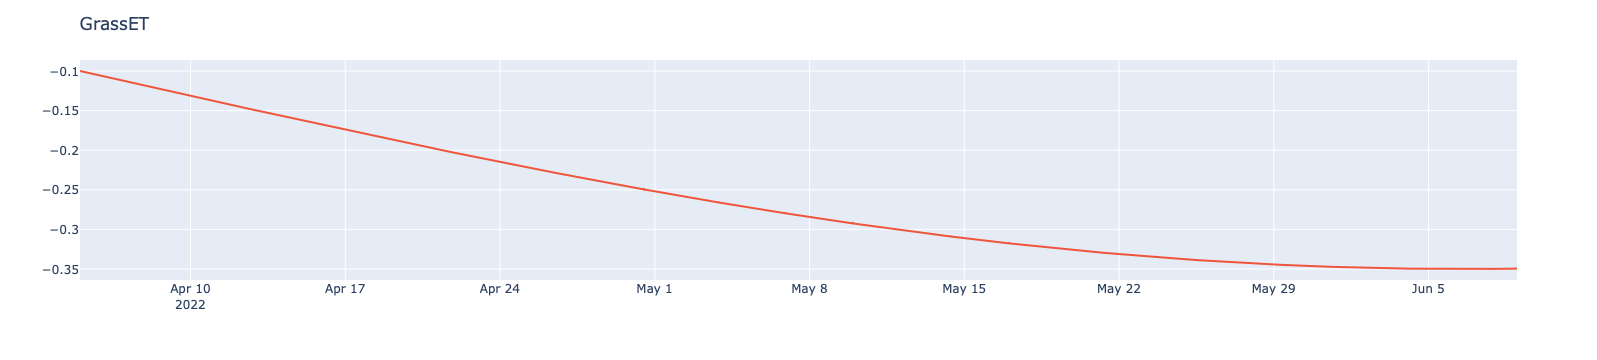

In [23]:
fig = px.line()
fig.add_trace(go.Scatter(x=dfOut['date'], y=dfOut['save'], mode='lines', name='GEO'))
fig.update_layout(title= 'GrassET')
fig.show()

# Save to a .csv file

In [24]:
os.chdir("/Users/concettadamato/Eclipse_workspace_12/GEOSPACE-1D_simulation/data/4Lys")
#os.listdir()

In [25]:
write_timeseries_csv(dfOut,'RootDepth_0707_01.csv',ID_basin)



***SUCCESS writing!  RootDepth_0707_01.csv
